In [1]:
import scipy.io as sio
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

Using TensorFlow backend.


In [8]:
#loading data
#DDataFile = 'E:\\MEng_Project\\Keras_Data_1\\D_VLOS_scaled_mean_mean_alpha6_fft_abs_Frobenius_sphericalWave_B32_U2048.mat'
DDataFile = './D_VLOS_scaled_mean_mean_alpha6_fft_abs_Frobenius_sphericalWave_B32_U2048.mat'
DData = sio.loadmat(DDataFile)

LocationDataFile = 'E:\\MEng_Project\\Keras_Data_1\\randLocationU2048VIP.mat'
locationData = sio.loadmat(LocationDataFile)

In [9]:
#preprocessing the data
D_data = DData['D']
location_data = locationData['location']
location_data = location_data[:2,:]

print(D_data)
l, total = D_data.shape
d, total = location_data.shape

train_length = int(np.floor(total * 0.7))

impulses_train = np.transpose(D_data[:, :train_length])
location_train = np.transpose(location_data[:,:train_length])

impulses_test = np.transpose(D_data[:, train_length:])
location_test = np.transpose(location_data[:,train_length:])


[[8.50325452e-04 9.51648677e-05 3.17881766e-02 ... 2.76542311e-04
  2.36007275e-02 4.90538899e-03]
 [1.46654524e-03 3.09801788e-04 4.07863987e-03 ... 7.95052249e-04
  1.67783715e-01 8.96869260e-03]
 [2.71246959e-03 5.77391553e-04 1.61314211e-02 ... 3.20596330e-04
  2.55453819e-02 3.52087886e-03]
 ...
 [6.03760859e-03 2.76427758e-03 3.30138909e-03 ... 1.99136989e-03
  2.95645116e-02 2.01543032e-02]
 [3.04845881e-03 2.39125216e-03 3.23874188e-03 ... 1.59812666e-03
  6.91754047e-02 3.52595784e-03]
 [5.02776007e-03 2.76523322e-03 9.89591139e-04 ... 4.90478104e-03
  8.96585968e-02 6.69385365e-03]]


In [4]:
#Build the model
model = keras.Sequential()

keras.layers.normalization.BatchNormalization()#epsilon=1e-06, mode=0, momentum=0.9, weights=None)
#model.add(Dropout(0.2)) # best 0.2
keras.layers.Conv2D(1024, 3)  #, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)
keras.layers.AveragePooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)

# keras.layers.normalization.BatchNormalization()#epsilon=1e-06, mode=0, momentum=0.9, weights=None)
# #model.add(Dropout(0.2)) # best 0.2
# keras.layers.Conv2D(2048, 3)  #, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)
# keras.layers.AveragePooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)

keras.layers.normalization.BatchNormalization()
model.add(Dropout(0.25)) # best 0.2
model.add(Dense(256, activation = 'relu'))  #tanh(343,1794)   relu (680,1600)   #the hidden layer number 

# keras.layers.normalization.BatchNormalization()
# model.add(Dropout(0.25)) # best 0.2
# model.add(Dense(1024, activation = 'relu'))  #tanh(343,1794)   relu (680,1600)   #the hidden layer number 

model.add(Dense(d, activation = 'linear'))  # None is different from 'linear'      ### the output layer

In [5]:
#Compilation
loss_func = 'mean_squared_error'   #   categorical_crossentropy(bad)   mean_squared_error
opt_func = keras.optimizers.Adam(lr=0.1) #'Adam'  lr=0.2  #  RMSprop(overfiiting) sgd(overfitting)  Adadelta(overfitting)   Adam

model.compile(loss = loss_func, 
              optimizer = opt_func,
             metrics = ['mae'])

#best set: categorical_crossentropy  and sgd, but the loss and acc do not change....

In [6]:
#Train the model, iterating
early_stop = keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.1)
history = model.fit(impulses_train, location_train,
                    batch_size = 20, # 10,20
                    epochs = 200,
                    verbose = 2,
                   # callbacks=[early_stop], 
                    validation_split = 0.2 #0.2
                    #validation_data=(impulses_test, location_test)
                   )


Train on 1146 samples, validate on 287 samples
Epoch 1/200
 - 0s - loss: 19963.4904 - mean_absolute_error: 103.1288 - val_loss: 6426.5426 - val_mean_absolute_error: 64.4183
Epoch 2/200
 - 0s - loss: 6121.9867 - mean_absolute_error: 60.0578 - val_loss: 5301.4280 - val_mean_absolute_error: 57.0075
Epoch 3/200
 - 0s - loss: 5155.8462 - mean_absolute_error: 54.5607 - val_loss: 4699.8662 - val_mean_absolute_error: 53.5530
Epoch 4/200
 - 0s - loss: 4808.2188 - mean_absolute_error: 53.1581 - val_loss: 6343.6910 - val_mean_absolute_error: 62.5182
Epoch 5/200
 - 0s - loss: 3906.8218 - mean_absolute_error: 48.7938 - val_loss: 3793.9409 - val_mean_absolute_error: 47.9746
Epoch 6/200
 - 0s - loss: 4278.3463 - mean_absolute_error: 50.3107 - val_loss: 3952.4781 - val_mean_absolute_error: 49.8392
Epoch 7/200
 - 0s - loss: 3794.4896 - mean_absolute_error: 47.8112 - val_loss: 3362.0412 - val_mean_absolute_error: 43.7277
Epoch 8/200
 - 0s - loss: 3382.8110 - mean_absolute_error: 44.3743 - val_loss: 4150

Epoch 67/200
 - 0s - loss: 1359.5512 - mean_absolute_error: 28.0383 - val_loss: 2390.2826 - val_mean_absolute_error: 37.0241
Epoch 68/200
 - 0s - loss: 1387.3580 - mean_absolute_error: 28.3574 - val_loss: 2522.7346 - val_mean_absolute_error: 38.4089
Epoch 69/200
 - 0s - loss: 1238.3091 - mean_absolute_error: 26.9859 - val_loss: 2311.9207 - val_mean_absolute_error: 36.3707
Epoch 70/200
 - 0s - loss: 1393.5259 - mean_absolute_error: 28.1687 - val_loss: 2571.6195 - val_mean_absolute_error: 38.8982
Epoch 71/200
 - 0s - loss: 1335.5654 - mean_absolute_error: 28.3969 - val_loss: 2428.8112 - val_mean_absolute_error: 37.4508
Epoch 72/200
 - 0s - loss: 1367.6742 - mean_absolute_error: 28.1561 - val_loss: 2802.8331 - val_mean_absolute_error: 39.3410
Epoch 73/200
 - 0s - loss: 1364.3285 - mean_absolute_error: 27.6948 - val_loss: 2404.1882 - val_mean_absolute_error: 37.9321
Epoch 74/200


KeyboardInterrupt: 

In [200]:
#make prediction
loc_prediction = model.predict(impulses_test)
print(loc_prediction.shape)
print(location_test.shape)

(615, 2)
(615, 2)


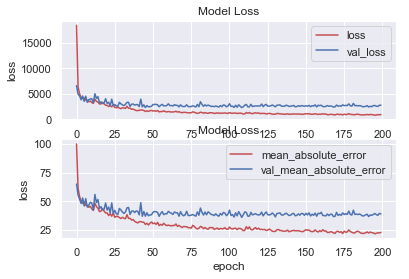

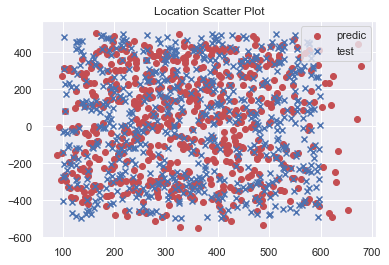

In [201]:
#plot the loss data
plt.subplot(211)
plt.plot(history.history['loss'],'r',label = 'loss')
plt.plot(history.history['val_loss'],'b', label = 'val_loss')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()


plt.subplot(212)
plt.plot(history.history['mean_absolute_error'],'r',label = 'mean_absolute_error')
plt.plot(history.history['val_mean_absolute_error'],'b', label = 'val_mean_absolute_error')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_title('Location Scatter Plot')
ax1.scatter(loc_prediction[:,0],loc_prediction[:,1],c = 'r',marker = 'o', label = 'predic')
ax1.scatter(location_test[:,0],location_test[:,1],c = 'b',marker = 'x', label = 'test')
plt.legend()
plt.show()

In [202]:
#The training result
loss = model.evaluate(impulses_test, location_test, verbose=1)
print ('Test loss & mean_absolute_error: ', loss)
#loss, acc = model.evaluate(impulses_test, location_test, verbose=0)
#print ('Test accuracy', acc)

615/615 [==============================] - 0s 32us/step
Test loss & mean_absolute_error:  [2868.0882947472055, 40.35838626768531]


error distance is  62.39127184817413
max error distance is  293.3319339939319
min error distance is  0.5435726267257428


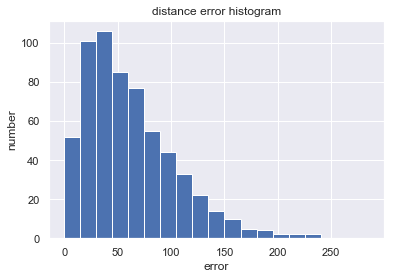

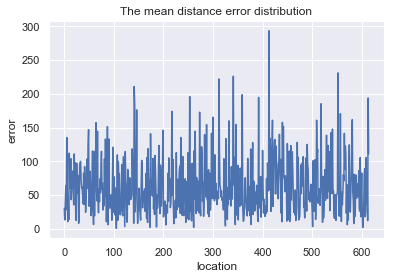

In [203]:
#calculate the mean of error distance
err = loc_prediction - location_test
x = err[:,:1]
y = err[:,1:]

err_abs = np.abs(err)

# err_abs_mean = np.mean(err_abs)
# print(err_abs_mean)
#print(err_abs_mean.shape)
err_dis = np.sqrt(np.square(x)+np.square(y))
err_min = np.min(err_dis)
err_max = np.max(err_dis)
err_avg = np.mean(err_dis)
print("error distance is ", err_avg)
print("max error distance is ", err_max)
print("min error distance is ", err_min)
#set the value of x, y, z
x,y,z = location_test[:,:1],location_test[:,1:2],err_dis
z_max = np.round(max(z))
z_min = np.round(max(z))

#plot the 2D image of error
plt.figure(1)
#plt.subplot(2,1,2)
plt.hist(err_dis, bins =  range(0,300,15)) 
plt.xlabel("error")
plt.ylabel("number")
plt.title("distance error histogram") 

plt.figure(2)
#plt.subplot(2,1,1)
plt.plot(err_dis)
plt.title("The mean distance error distribution")
plt.xlabel("location")
plt.ylabel("error")
plt.show()


Text(0.5, 0.92, 'The mean distance error of 3D Iamge')

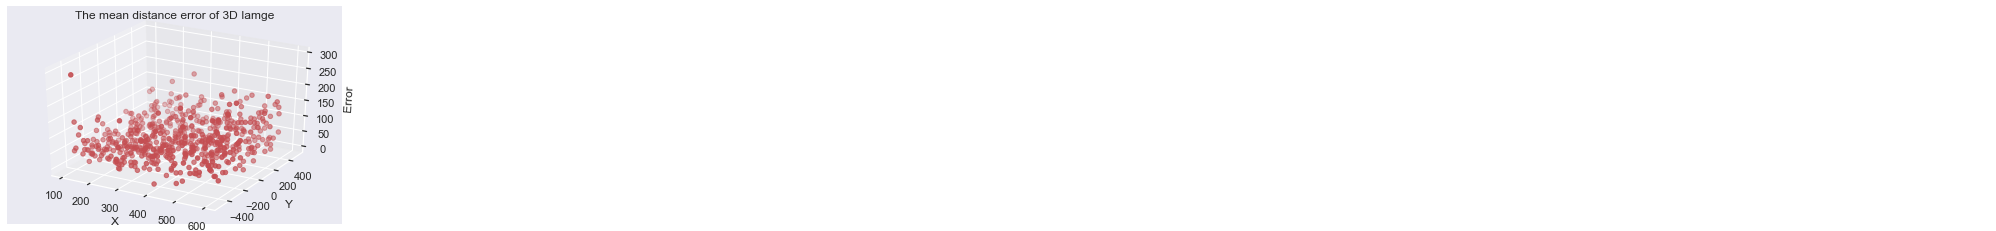

In [204]:
#plot 3D image
ax = plt.subplot(111,projection='3d')
ax.scatter(x,y,z,c='r')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Error")
plt.title("The mean distance error of 3D Iamge")

Text(0.5, 1.0, "The mean distance error of 'heat map'")

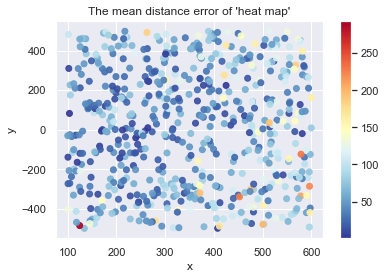

In [205]:
#draw the "heatmap" of error
fig = plt.figure()
ax3 = fig.add_subplot(111)
cm = plt.cm.get_cmap('RdYlBu_r') #Accent   RdYlBu  Blues_r  Greens  YlOrBr_r

sc = ax3.scatter(x,y,c = z, marker = 'o', label = 'test',alpha=0.9, cmap=cm)
plt.colorbar(sc)
ax3.set_xlabel("x")
ax3.set_ylabel("y")
plt.title("The mean distance error of 'heat map'")